# 1. Data Loading

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import re

In [2]:
df = pd.read_excel(r"C:\Users\sahil\Desktop\excelr data science\Projects\Sentiment Analysis\P556.xlsx")

# 2. Data Preprocessing



In [3]:
df.head(10)

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
5,Too much lagging and slow,1,I will never purchase Samsung phones. Phone is...
6,Worst samsung mobile ever,1,This is worst samsung mobile I have seen from ...
7,कैसा दिखाते है उसका 10 % भी नही,1,मोबाइल का कैमरा बिल्कुल भी सही नही है 48 PM बत...
8,Slow performance,1,The phone hangs a lot and is very slow. I rece...
9,Don’t buy from Amazon.,1,Very poor quality camera .Found box seal damag...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [5]:
df['rating'].value_counts()


5    419
1    386
4    310
3    199
2    126
Name: rating, dtype: int64

In [6]:
df.isna().sum()

title     0
rating    0
body      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Combining title and body into single column

df["review"]=df["title"].astype(str) + " " + df["body"].astype(str)

In [9]:
df.head()

,title,rating,body,review
0,Horrible product,1,Very disappointed with the overall performance...,Horrible product Very disappointed with the ov...
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Camera quality is not like 48 megapixel Camera...
2,Overall,4,"Got the mobile on the launch date,Battery must...","Overall Got the mobile on the launch date,Batt..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,A big no from me 1. It doesn't work with 5.0GH...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Put your money somewhere else Not worth buying...


In [10]:
# Now lets drop title and body column

df.drop(columns=["title","body"],inplace= True)

In [11]:
df.head()

,rating,review
0,1,Horrible product Very disappointed with the ov...
1,3,Camera quality is not like 48 megapixel Camera...
2,4,"Overall Got the mobile on the launch date,Batt..."
3,1,A big no from me 1. It doesn't work with 5.0GH...
4,1,Put your money somewhere else Not worth buying...


In [12]:
# Converting ratings into sentiment 

def get_sentiment(rating):
    if rating <=2:
        return 0  # Negative
    elif rating==3: 
        return 1   # Neutral
    else:
        return 2   # Positive
        

In [13]:
df["sentiment"]=df["rating"].apply(get_sentiment)

In [14]:
df.head()

,rating,review,sentiment
0,1,Horrible product Very disappointed with the ov...,0
1,3,Camera quality is not like 48 megapixel Camera...,1
2,4,"Overall Got the mobile on the launch date,Batt...",2
3,1,A big no from me 1. It doesn't work with 5.0GH...,0
4,1,Put your money somewhere else Not worth buying...,0


In [15]:
df.drop(columns=["rating"],inplace= True)

In [16]:
df.head()

,review,sentiment
0,Horrible product Very disappointed with the ov...,0
1,Camera quality is not like 48 megapixel Camera...,1
2,"Overall Got the mobile on the launch date,Batt...",2
3,A big no from me 1. It doesn't work with 5.0GH...,0
4,Put your money somewhere else Not worth buying...,0


In [17]:

from langdetect import detect


In [18]:
df["language"]=df["review"].astype(str).apply(detect)

In [19]:
df.head()

,review,sentiment,language
0,Horrible product Very disappointed with the ov...,0,en
1,Camera quality is not like 48 megapixel Camera...,1,ca
2,"Overall Got the mobile on the launch date,Batt...",2,en
3,A big no from me 1. It doesn't work with 5.0GH...,0,en
4,Put your money somewhere else Not worth buying...,0,en


In [20]:
from langdetect.lang_detect_exception import LangDetectException

def detect_hi_en(text):
    try:
        lang=detect(text)
        if lang=="hi":
            return "hi"
        else:
            return "en"
    except LangDetectException:
        return "en"

In [21]:
df["language"]=df["review"].astype(str).apply(detect_hi_en)

In [22]:
df.head(10)

,review,sentiment,language
0,Horrible product Very disappointed with the ov...,0,en
1,Camera quality is not like 48 megapixel Camera...,1,en
2,"Overall Got the mobile on the launch date,Batt...",2,en
3,A big no from me 1. It doesn't work with 5.0GH...,0,en
4,Put your money somewhere else Not worth buying...,0,en
5,Too much lagging and slow I will never purchas...,0,en
6,Worst samsung mobile ever This is worst samsun...,0,en
7,कैसा दिखाते है उसका 10 % भी नही मोबाइल का कैमर...,0,hi
8,Slow performance The phone hangs a lot and is ...,0,en
9,Don’t buy from Amazon. Very poor quality camer...,0,en


In [23]:
df_hi=df[df["language"]== "hi"].copy()
df_hi.head(10)

,review,sentiment,language
7,कैसा दिखाते है उसका 10 % भी नही मोबाइल का कैमर...,0,hi
248,Damage product reshived Damage product reshive...,0,hi
421,अमेज़न आपके द्वारा खरीदा samsung m12 6GB ram 12...,0,hi
460,असंतोषजनक इस फोन में कई कमियां है जैसे इसकी नो...,0,hi
524,पैसे की बर्बादी है ये मोबाइल घण्टा true 48 meg...,0,hi
700,सैमसंग के मोबाइल के मेरे लिए बेस्ट रहते है। ये...,2,hi
794,इस फोन में बहुत सारे प्रॉब्लम है इस फोन में बह...,0,hi
887,"बकबास फ़ोन, पैसे खड्डे में गए Worst phone. एक...",0,hi
1051,कैमरा इस mobile का कैमरा बहुत ही बकवास हैं कम्...,0,hi
1301,Very bad 👎 कैमरा क्वालिटी बिल्कुल खराब है बैटर...,0,hi


In [24]:

from langdetect import detect
from googletrans import Translator
translator= Translator()

def translate_if_hindi(text):
    try:
        if detect(text)=="hi":
            return translator.translate(text, src="hi",dest="en").text
        else:
            return text
    except:
        return text

In [25]:
df["review_trans"]=df["review"].apply(translate_if_hindi)

In [26]:
df["review_trans"].head(10)

0    Horrible product Very disappointed with the ov...
1    Camera quality is not like 48 megapixel Camera...
2    Overall Got the mobile on the launch date,Batt...
3    A big no from me 1. It doesn't work with 5.0GH...
4    Put your money somewhere else Not worth buying...
5    Too much lagging and slow I will never purchas...
6    Worst samsung mobile ever This is worst samsun...
7    Not even 10 % of the mobile camera is not righ...
8    Slow performance The phone hangs a lot and is ...
9    Don’t buy from Amazon. Very poor quality camer...
Name: review_trans, dtype: object

In [27]:
# Download necessary resources
nltk.download('wordnet')        # Lemmatizer data
nltk.download('omw-1.4')        # Optional WordNet data
nltk.download('punkt')          # For word_tokenize
nltk.download('stopwords')      # English stopwords


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]', '',text)
    tokens= nltk.word_tokenize(text)
    tokens= [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df["clean_review"]=df["review_trans"].apply(preprocess_text)

In [29]:
df["clean_review"]

0       horrible product disappointed overall performa...
1        camera quality like megapixel camera quality low
2       overall got mobile launch datebattery must app...
3       big doesnt work ghz wifi frequency ghz old sch...
4       put money somewhere else worth buyingfaulty so...
                              ...                        
1435                    excellent mobile excellent mobile
1436    never expected samsung mobile performance poor...
1437    good value money battery life good camera clar...
1438    unreal whitish display bad product highly diss...
1439    beast best phone real beast battery last easil...
Name: clean_review, Length: 1440, dtype: object

In [30]:
df['review_length'] = df['clean_review'].apply(lambda x: len(str(x).split()))

In [31]:
df.head()

,review,sentiment,language,review_trans,clean_review,review_length
0,Horrible product Very disappointed with the ov...,0,en,Horrible product Very disappointed with the ov...,horrible product disappointed overall performa...,6
1,Camera quality is not like 48 megapixel Camera...,1,en,Camera quality is not like 48 megapixel Camera...,camera quality like megapixel camera quality low,7
2,"Overall Got the mobile on the launch date,Batt...",2,en,"Overall Got the mobile on the launch date,Batt...",overall got mobile launch datebattery must app...,38
3,A big no from me 1. It doesn't work with 5.0GH...,0,en,A big no from me 1. It doesn't work with 5.0GH...,big doesnt work ghz wifi frequency ghz old sch...,37
4,Put your money somewhere else Not worth buying...,0,en,Put your money somewhere else Not worth buying...,put money somewhere else worth buyingfaulty so...,27


In [32]:
df.drop(columns=["review_trans","language","review"],inplace=True)

In [33]:
df.head()

,sentiment,clean_review,review_length
0,0,horrible product disappointed overall performa...,6
1,1,camera quality like megapixel camera quality low,7
2,2,overall got mobile launch datebattery must app...,38
3,0,big doesnt work ghz wifi frequency ghz old sch...,37
4,0,put money somewhere else worth buyingfaulty so...,27


# 3) Exploratory Data Analysis (EDA)



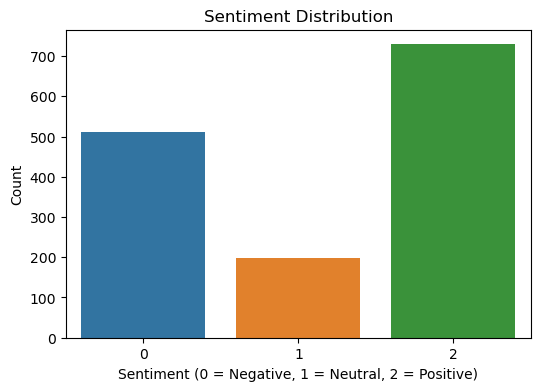

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Neutral, 2 = Positive)')
plt.ylabel('Count')
plt.show()

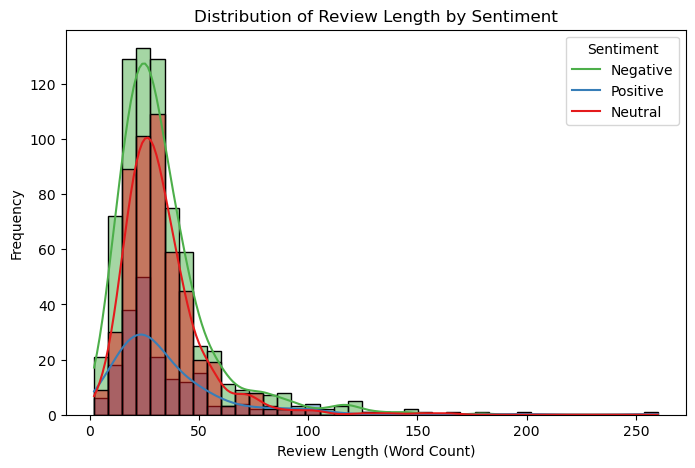

In [35]:
# Review Length Distribution by Sentiment

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='review_length', hue='sentiment', kde=True,
             palette='Set1', bins=40)
plt.title("Distribution of Review Length by Sentiment")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Frequency")
plt.legend(title='Sentiment', labels=['Negative', 'Positive','Neutral'])
plt.show()


In [36]:
# Map numeric values to sentiment labels
df['sentiment'] = df['sentiment'].map({0: 'negative', 1: 'neutral', 2: 'positive'})


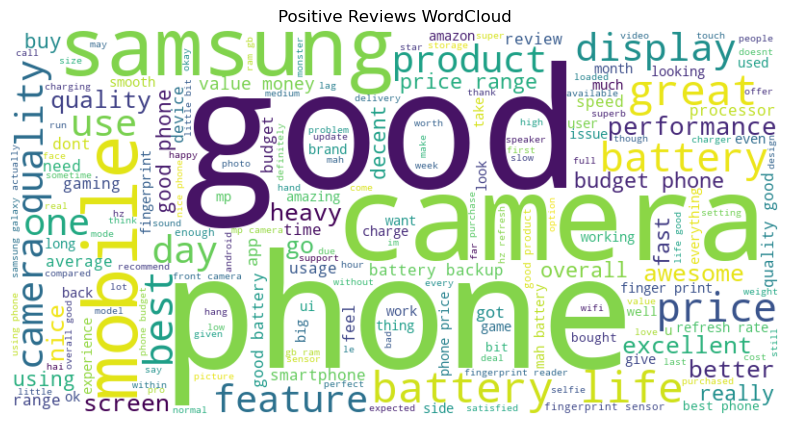

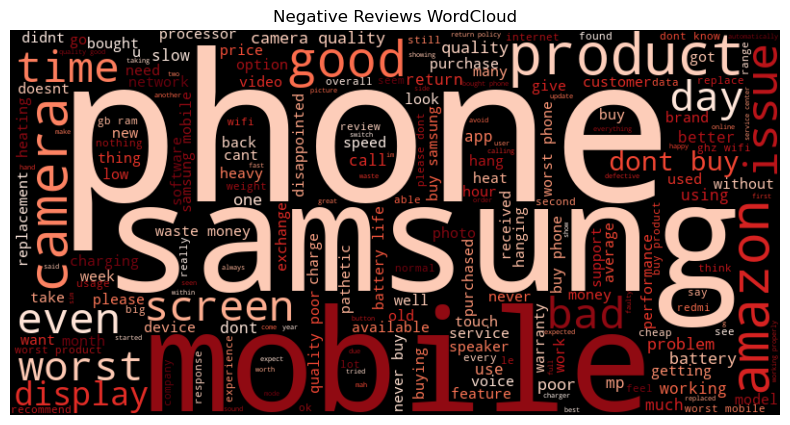

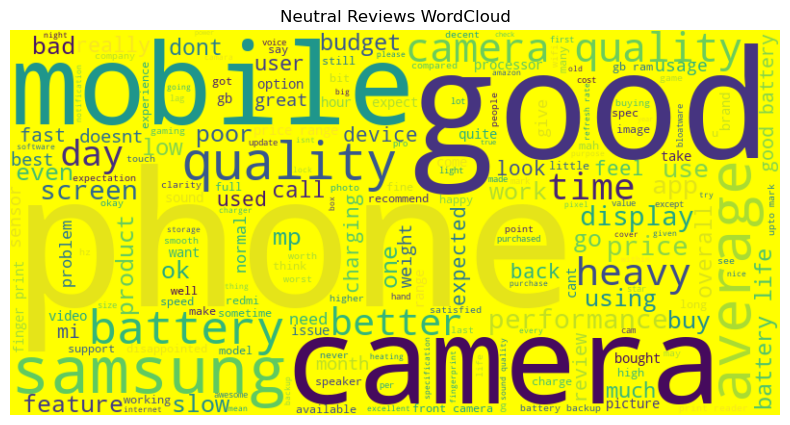

In [37]:
# WordClouds for Positive, Negative and Neutral Reviews

# Create text groups for each sentiment
pos_text = " ".join(df[df['sentiment'] == 'positive']['clean_review'].astype(str))
neu_text = " ".join(df[df['sentiment'] == 'neutral']['clean_review'].astype(str))
neg_text = " ".join(df[df['sentiment'] == 'negative']['clean_review'].astype(str))

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(pos_text), interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text), interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='yellow').generate(neu_text), interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Reviews WordCloud")
plt.show()



# 4) Feature Extraction

In [38]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment']

# 5) Model Building

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)



 Naive Bayes


In [41]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


Support Vector Machine


In [42]:
from sklearn.svm import SVC


In [43]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred_svm = svm_model.predict(X_test)


# 6) Model Evaluation:

In [45]:
# 1) logistic Regression

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.7951388888888888
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89       111
     neutral       0.67      0.05      0.09        44
    positive       0.73      0.97      0.83       133

    accuracy                           0.80       288
   macro avg       0.77      0.63      0.60       288
weighted avg       0.79      0.80      0.74       288



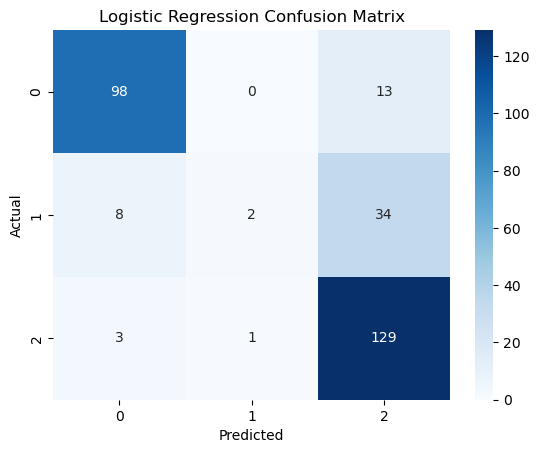

In [46]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
# 2) Naive Bayes

print(" Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

 Naive Bayes Performance:
Accuracy: 0.7152777777777778
              precision    recall  f1-score   support

    negative       0.96      0.67      0.79       111
     neutral       0.00      0.00      0.00        44
    positive       0.63      0.99      0.77       133

    accuracy                           0.72       288
   macro avg       0.53      0.55      0.52       288
weighted avg       0.66      0.72      0.66       288



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


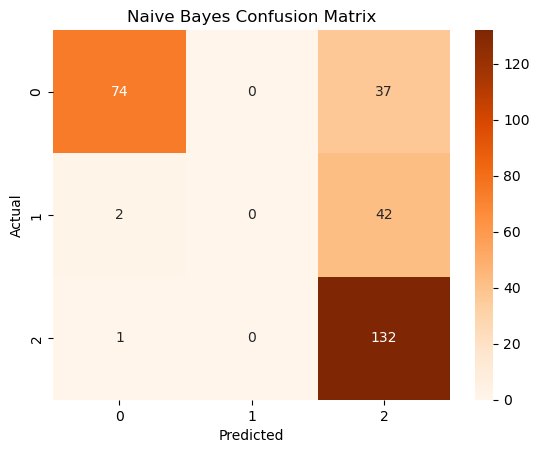

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# 3) Support Vector Machines:

print(" SVM Model Performance (Linear Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


 SVM Model Performance (Linear Kernel)
Accuracy: 0.7951388888888888

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.88      0.87       111
     neutral       0.56      0.11      0.19        44
    positive       0.76      0.95      0.85       133

    accuracy                           0.80       288
   macro avg       0.73      0.65      0.64       288
weighted avg       0.77      0.80      0.76       288



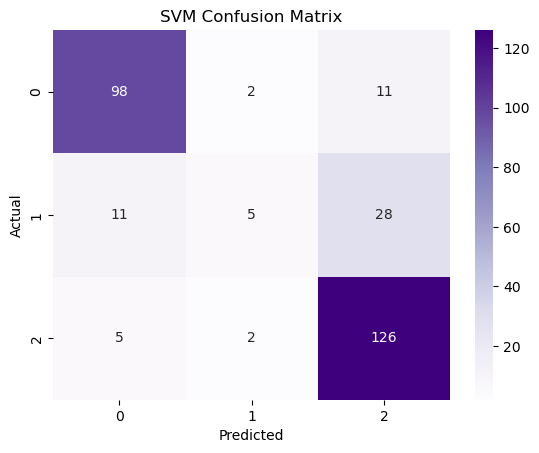

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

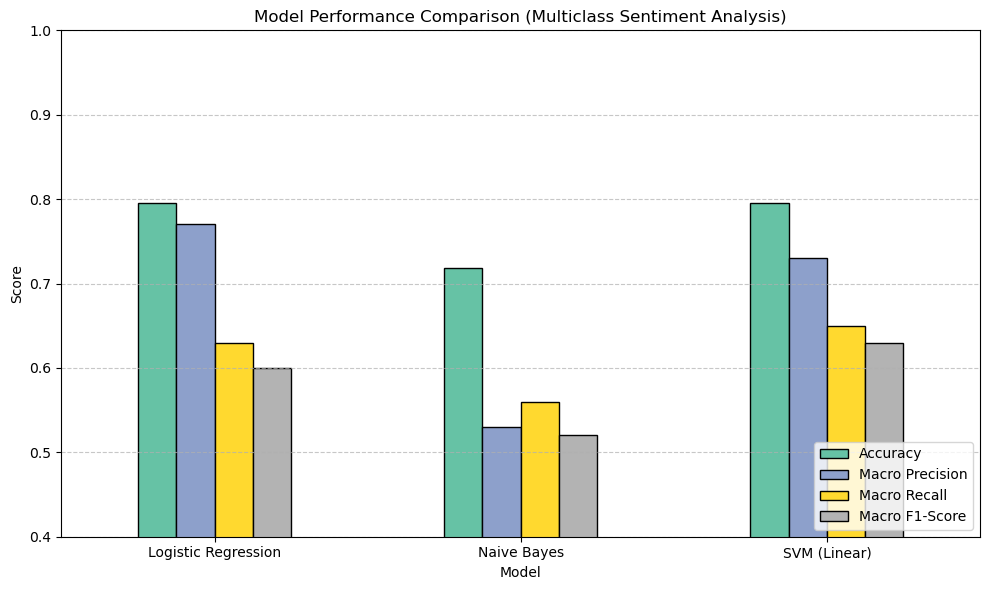

In [51]:
#  Create performance dictionary
results = {
    "Logistic Regression": [0.7951, 0.77, 0.63, 0.60],
    "Naive Bayes": [0.7188, 0.53, 0.56, 0.52],
    "SVM (Linear)": [0.7951, 0.73, 0.65, 0.63]
}

#  Create DataFrame
metrics_df = pd.DataFrame(results, index=["Accuracy", "Macro Precision", "Macro Recall", "Macro F1-Score"]).T

#  Plot
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')

plt.title("Model Performance Comparison (Multiclass Sentiment Analysis)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.4, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 7) Model Deployment:

In [52]:
import pickle

# Save the best model, SVM
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

